Machine Learning Trading Bot
In this Challenge, you’ll assume the role of a financial advisor at one of the top five financial advisory firms in the world. Your firm constantly competes with the other major firms to manage and automatically trade assets in a highly dynamic environment. In recent years, your firm has heavily profited by using computer algorithms that can buy and sell faster than human traders.

The speed of these transactions gave your firm a competitive advantage early on. But, people still need to specifically program these systems, which limits their ability to adapt to new data. You’re thus planning to improve the existing algorithmic trading systems and maintain the firm’s competitive advantage in the market. To do so, you’ll enhance the existing trading signals with machine learning algorithms that can adapt to new data.

Instructions:
Use the starter code file to complete the steps that the instructions outline. The steps for this Challenge are divided into the following sections:

Establish a Baseline Performance

Tune the Baseline Trading Algorithm

Evaluate a New Machine Learning Classifier

Create an Evaluation Report

Establish a Baseline Performance¶

In [1]:
#!pip install alpaca_trade_api
#!pip3 install alpaca-trade-api

In [71]:
# Import dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import os
import requests
import json
from dotenv import load_dotenv
from alpaca_trade_api.rest import TimeFrame 
import alpaca_trade_api as tradeapi
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
import datetime
from datetime import date,timedelta
from finta import TA
import csv

%matplotlib inline

In [72]:
# importing and cleaning sp500_df data frame 
#sp500_df = pd.read_csv(Path("Resources/500S&P.csv"))
#sp500_df = sp500_df.drop(columns = ["Unnamed: 2","Industrials"])

In [73]:
#print(sp500_df)

In [74]:
#stock = []

#def sp500_list(df):
    #ticker = input("Enter the ticker of the stock of your choice to trade: ").upper()
    #for x in sp500_df["3M"]:
        #if ticker == x:
            #stock.append(ticker)
            #print(f"Your choice of ticker to trade from the S&P500: {stock}")
            #return stock
        #else:
            #return print("Ticker doesn't appear to be in the S&P 500 try again")

#sp500_list(df = sp500_df)


In [75]:
load_dotenv()

True

Step 1: Import the ticker dataset into a Pandas DataFrame.

#### SETTING INPUT VALUES

In [76]:
stock = ["TSLA"]
initial_capital = 1000000
shares = 100 

#### SETTING THE VARIABLES
Set the variables for the Alpaca API and secret keys. Import, slice and clean the data and set it to the dataframe.

In [77]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
alpaca_api_key 
alpaca_secret_key 

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

current_date = date.today()
end_date = current_date - timedelta(1)
end_date =end_date
start_date = end_date - timedelta(365)
print(current_date)
print(start_date)

2022-04-16
2021-04-15


In [78]:
ticker_df = alpaca.get_bars(
    stock,
   TimeFrame.Day, 
   start=start_date,
   end=end_date,
   limit=None
).df

# Review the Alpaca DataFrame
display(ticker_df)

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2021-04-15 04:00:00+00:00,743.51,743.6900,721.3100,738.700,27386795,721771,732.513418,TSLA
2021-04-16 04:00:00+00:00,730.20,749.4100,724.6000,739.395,27305717,727007,736.593191,TSLA
2021-04-19 04:00:00+00:00,718.00,725.4000,691.8001,714.980,39309333,1001404,708.741548,TSLA
2021-04-20 04:00:00+00:00,717.39,737.2500,710.6850,718.790,34937852,820998,722.209279,TSLA
2021-04-21 04:00:00+00:00,704.40,744.8400,698.0000,743.910,30450439,748605,724.076159,TSLA
...,...,...,...,...,...,...,...,...
2022-04-08 04:00:00+00:00,1043.37,1048.4400,1022.4350,1025.490,18322602,581669,1034.432178,TSLA
2022-04-11 04:00:00+00:00,980.14,1008.4681,974.6400,975.930,19766358,755867,987.915302,TSLA
2022-04-12 04:00:00+00:00,997.81,1021.1921,976.6001,986.950,21945056,614319,997.275837,TSLA


In [79]:
# Filter the date index, close and vwap columns
signals_df = ticker_df.loc[:, ["close", "vwap"]]

#### Calculating RSI ( Relative Strength Index)

In [80]:
signals_df["RSI"] = TA.RSI(ticker_df)
signals_df

,close,vwap,RSI
timestamp,,,
2021-04-15 04:00:00+00:00,738.700,732.513418,NaN
2021-04-16 04:00:00+00:00,739.395,736.593191,100.000000
2021-04-19 04:00:00+00:00,714.980,708.741548,2.575211
2021-04-20 04:00:00+00:00,718.790,722.209279,16.282150
2021-04-21 04:00:00+00:00,743.910,724.076159,58.119405
...,...,...,...
2022-04-08 04:00:00+00:00,1025.490,1034.432178,54.246322
2022-04-11 04:00:00+00:00,975.930,987.915302,48.117954
2022-04-12 04:00:00+00:00,986.950,997.275837,49.484531


In [81]:
# RSI using the math formula
#change = ticker_df['open'].diff()
#is_gain, is_loss = change > 0, change < 0
#gain, loss = change, -change
#gain[is_loss] = 0
#loss[is_gain] = 0

#gain.name = 'gain'
#loss.name = 'loss'
#gain_loss = pd.concat([gain, loss], axis=1)

#n = 14
#avg_gain = gain.rolling(window=n).mean()
#avg_loss = loss.rolling(window=n).mean()

#rs = avg_gain / avg_loss

#signals_df['RSI_14'] = 100 - (100 / (1 + rs))
#signals_df.dropna()
#signals_df

## Step 2: Generate trading signals using short-window and long-window SMA with RSI values. 

In [82]:
# Set the short window and long window
short_window = 10
long_window = 30

# Generate the fast and slow simple moving averages (50 and 100 days, respectively)
signals_df['SMA_FAST'] = signals_df['close'].rolling(window=short_window).mean()
signals_df['SMA_SLOW'] = signals_df['close'].rolling(window=long_window).mean()
signals_df['SMA_Signal'] = 0.0

In [83]:
# Generate the trading signal 1 or 0,

# where 1 is when the SMA_50 is greater than the SMA_100 and RSI is greater than 50
# where 0 is when the SMA_50 is less than than the SMA_100 and/or RSI is less than 50

signals_df['SMA_Signal'][short_window:] = np.where(
    signals_df['SMA_FAST'][short_window:] > signals_df['SMA_SLOW'][short_window:], 1.0, 0.0
)
signals_df["RSI_Signal"] = np.where(
    signals_df["RSI"] >= 50, 1.0, 0.0
)
signals_df["Signal"] = signals_df['SMA_Signal'][short_window:] * signals_df["RSI_Signal"]


                                                
                                                 

# Calculate the points in time at which a position should be taken, 1 or -1
signals_df['Entry/Exit'] = signals_df['Signal'].diff()
signals_df = signals_df.fillna(0)

# Review the DataFrame
display(signals_df.head(40))
display(signals_df.tail(20))

,close,vwap,RSI,SMA_FAST,SMA_SLOW,SMA_Signal,RSI_Signal,Signal,Entry/Exit
timestamp,,,,,,,,,
2021-04-15 04:00:00+00:00,738.7000,732.513418,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
2021-04-16 04:00:00+00:00,739.3950,736.593191,100.000000,0.00000,0.000000,0.0,1.0,0.0,0.0
2021-04-19 04:00:00+00:00,714.9800,708.741548,2.575211,0.00000,0.000000,0.0,0.0,0.0,0.0
2021-04-20 04:00:00+00:00,718.7900,722.209279,16.282150,0.00000,0.000000,0.0,0.0,0.0,0.0
2021-04-21 04:00:00+00:00,743.9100,724.076159,58.119405,0.00000,0.000000,0.0,1.0,0.0,0.0
2021-04-22 04:00:00+00:00,719.6900,734.842109,38.264123,0.00000,0.000000,0.0,0.0,0.0,0.0
2021-04-23 04:00:00+00:00,729.4000,728.878656,46.199554,0.00000,0.000000,0.0,0.0,0.0,0.0
2021-04-26 04:00:00+00:00,738.2000,736.704552,52.196631,0.00000,0.000000,0.0,1.0,0.0,0.0
2021-04-27 04:00:00+00:00,704.7400,711.073255,35.838557,0.00000,0.000000,0.0,0.0,0.0,0.0


,close,vwap,RSI,SMA_FAST,SMA_SLOW,SMA_Signal,RSI_Signal,Signal,Entry/Exit
timestamp,,,,,,,,,
2022-03-18 04:00:00+00:00,905.39,896.239900,55.917076,830.674,856.644667,0.0,1.0,0.0,0.0
2022-03-21 04:00:00+00:00,921.16,922.470994,57.602766,842.332,856.572667,0.0,1.0,0.0,0.0
2022-03-22 04:00:00+00:00,993.98,963.002044,64.376754,859.290,859.460667,0.0,1.0,0.0,0.0
2022-03-23 04:00:00+00:00,999.11,1009.630009,64.803392,873.304,862.031000,1.0,1.0,1.0,1.0
2022-03-24 04:00:00+00:00,1013.92,1008.855793,66.066881,890.866,864.761667,1.0,1.0,1.0,0.0
2022-03-25 04:00:00+00:00,1010.64,1007.555657,65.506020,912.395,868.298000,1.0,1.0,1.0,0.0
2022-03-28 04:00:00+00:00,1091.84,1079.702073,71.872147,944.976,876.026000,1.0,1.0,1.0,0.0
2022-03-29 04:00:00+00:00,1099.57,1096.619293,72.394466,974.744,883.486333,1.0,1.0,1.0,0.0
2022-03-30 04:00:00+00:00,1093.99,1098.548645,71.364270,1000.120,889.205000,1.0,1.0,1.0,0.0


In [84]:
# Initialize the new Signal column
#signals_df['Signal'] = 0.0

In [85]:
# Visualize exit position relative to close price
exit = signals_df[signals_df['Entry/Exit'] == -1.0]['close'].hvplot.scatter(
    color='yellow',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize entry position relative to close price
entry = signals_df[signals_df['Entry/Exit'] == 1.0]['close'].hvplot.scatter(
    color='purple',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)


# Visualize moving averages
moving_avgs = signals_df[['SMA_FAST', 'SMA_SLOW']].hvplot(
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize rsi (relative strength index)
rsi = signals_df[['RSI']].hvplot(
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize vwap ( volume_weighted average price)
vwap = ticker_df[['vwap']].hvplot(
    color= "grey",
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize close price for the investment
security_close = signals_df[['close']].hvplot(
    line_color='black',
    ylabel='Price in $',
    width=1000,
    height=400
)


# Create the overlay plot
entry_exit_plot = security_close * moving_avgs * entry * exit * rsi * vwap

# Show the plot
entry_exit_plot.opts(
    title="SMA_SLOW, SMA_FAST, RSI, VWAP, ENTRY and EXIT Points"
)

:Overlay
   .Curve.I          :Curve   [timestamp]   (close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [timestamp]   (value)
   .Scatter.Close.I  :Scatter   [timestamp]   (close)
   .Scatter.Close.II :Scatter   [timestamp]   (close)
   .Curve.II         :Curve   [timestamp]   (RSI)
   .Curve.III        :Curve   [timestamp]   (vwap)

In [86]:
signals_df.hvplot(width=1000,
    height=400,)

:NdOverlay   [Variable]
   :Curve   [timestamp]   (value)

### Backtest the Algorithm

First, we set the initial capital investment to $100,000 and the share size of each trade to 400. This means that for each trade, we’ll buy or sell 500 shares of AAPL stock. The following code sets up these two variables:

In [87]:
# Remove columns that are no needed in this process
signals_df = signals_df.drop(["vwap", "RSI", "SMA_Signal", "RSI_Signal"], axis=1)

In [88]:
#  Set the initial capital investment to $100,000 and the share size of each trade to 400. This means that for each trade, we’ll buy or sell 500 shares of AAPL stock. The following code sets up these two variables:
# Set initial capital
initial_capital = float(initial_capital)

# Set the share size
share_size = shares 

Next, we create the following additional columns in our DataFrame for calculating the backtesting metrics:

The “Position” column: This column contains the number of shares of AAPL stock that the algorithm holds. Note that the algorithm buys a 500-share position when the DMAC “Signal” column contains a value of 1 (that is, when the “SMA50” value is greater than the “SMA100” value). The algorithm holds these 500 shares until the “Signal” column reverts to a value of 0 (that is, when the “SMA50” value is less than the “SMA100” value), which triggers the sale. We calculate the value for this column by multiplying the share size (500) by the value in the “Signal” column, as the following code shows:

In [89]:
# Buy a 500 share position when the dual moving average crossover Signal equals 1 
# Sell a 500 share position when the dual moving average crossover Signal equals 0 
signals_df['Position'] = share_size * signals_df['Signal']


The “Entry/Exit Position” column: Using the Pandas diff function, we find the specific points in time when the algorithm either buys or sells the 500-share position (which it determines from the “Position” column). This column can contain a value of 500 to mean entry (when the “Position” value changes from 0 to 500), −500 for exit (when the “Position” value changes from 500 to 0), and 0 for hold (when no change occurs in the “Position” value from one day to the next), as the following code shows:

In [90]:
# Determine the points in time where a 500 share position is bought or sold
signals_df['Entry/Exit Position'] = signals_df['Position'].diff()

The “Portfolio Holdings” column: This column contains the value of the AAPL shares that the algorithm holds. We use this column to determine the algorithm’s ROI. We calculate the portfolio holdings by multiplying the AAPL price in the “close” column by the “Position” value, which is the number of shares that the algorithm holds, as the following code shows:

In [91]:
# Multiply the close price by the number of shares held, or the Position
signals_df['Portfolio Holdings'] = signals_df['close'] * signals_df['Position']

The “Portfolio Cash” column: This column contains the amount of available cash that the portfolio holds. The first value in this column is the value of the initial capital investment—$100,000. When the algorithm buys AAPL stock, the portfolio cash decreases by the cost of the trade (500 shares multiplied by the “close” price). When the algorithm sells stock, the portfolio cash increases by the proceeds from the trade (−500 shares multiplied by the “close” price). (Note that we consider the proceeds to be a negative cost, thus adding cash back into the portfolio.) We calculate the value of the portfolio cash by subtracting the value of the cost or proceeds of each trade from the initial capital investment. We use the cumsum function to find the cumulative sum of the costs and proceeds of all the trades, which the “Entry/Exit Position” column indicates. We then subtract that value from the initial capital investment, as the following code shows:

In [92]:
# Subtract the amount of either the cost or proceeds of the trade from the initial capital invested
signals_df['Portfolio Cash'] = initial_capital - (signals_df['close'] * signals_df['Entry/Exit Position']).cumsum()

The ***“Portfolio Total”*** column: This column contains the current value of the portfolio, which is the value of the held stock plus the value of the portfolio cash. Accordingly, we calculate this value by adding the portfolio cash to the portfolio holdings, as the following code shows:

In [93]:
# Calculate the total portfolio value by adding the portfolio cash to the portfolio holdings (or investments)
signals_df['Portfolio Total'] = signals_df['Portfolio Cash'] + signals_df['Portfolio Holdings']

The ***“Portfolio Daily Returns”*** column: This column contains the daily return percentage of the portfolio total, or the day-to-day change in the value of the portfolio expressed as a percentage. We calculate this by calling the pct_chage function on the “Portfolio Total” value, as the following code shows:

In [94]:
# Calculate the portfolio daily returns
signals_df['Portfolio Daily Returns'] = signals_df['Portfolio Total'].pct_change()

The ***“Portfolio Cumulative Returns”*** column: This column calculates the cumulative return value of the portfolio, or the aggregate amount that the portfolio has gained or lost over the period. We calculate this by calling the cumprod function on the “Portfolio Daily Returns” value, as the following code shows:

In [95]:
# Calculate the portfolio cumulative returns
signals_df['Portfolio Cumulative Returns'] = (1 + signals_df['Portfolio Daily Returns']).cumprod() - 1


Finally, we can print our DataFrame to get our results, as the following code shows:

In [96]:
# Print the DataFrame
signals_df.dropna()
display(signals_df.head(50))
display(signals_df.tail(5))
#display(signals_df)


,close,SMA_FAST,SMA_SLOW,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
timestamp,,,,,,,,,,,,
2021-04-15 04:00:00+00:00,738.7000,0.00000,0.000000,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN
2021-04-16 04:00:00+00:00,739.3950,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,1000000.0,1000000.0,NaN,NaN
2021-04-19 04:00:00+00:00,714.9800,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,1000000.0,1000000.0,0.000000,0.000000
2021-04-20 04:00:00+00:00,718.7900,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,1000000.0,1000000.0,0.000000,0.000000
2021-04-21 04:00:00+00:00,743.9100,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,1000000.0,1000000.0,0.000000,0.000000
2021-04-22 04:00:00+00:00,719.6900,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,1000000.0,1000000.0,0.000000,0.000000
2021-04-23 04:00:00+00:00,729.4000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,1000000.0,1000000.0,0.000000,0.000000
2021-04-26 04:00:00+00:00,738.2000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,1000000.0,1000000.0,0.000000,0.000000
2021-04-27 04:00:00+00:00,704.7400,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,1000000.0,1000000.0,0.000000,0.000000


,close,SMA_FAST,SMA_SLOW,Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
timestamp,,,,,,,,,,,,
2022-04-08 04:00:00+00:00,1025.49,1081.281,945.021000,1.0,0.0,100.0,0.0,102549.0,904575.0,1007124.0,-0.003145,0.007124
2022-04-11 04:00:00+00:00,975.93,1069.690,948.537667,0.0,-1.0,0.0,-100.0,0.0,1002168.0,1002168.0,-0.004921,0.002168
2022-04-12 04:00:00+00:00,986.95,1058.428,952.623667,0.0,0.0,0.0,0.0,0.0,1002168.0,1002168.0,0.000000,0.002168
2022-04-13 04:00:00+00:00,1022.37,1051.266,957.373000,1.0,1.0,100.0,100.0,102237.0,899931.0,1002168.0,0.000000,0.002168
2022-04-14 04:00:00+00:00,985.00,1042.006,962.230000,0.0,-1.0,0.0,-100.0,0.0,998431.0,998431.0,-0.003729,-0.001569


The ***“Portfolio Total”*** column: This column contains the **current value** of the portfolio, which is the value of the held stock plus the value of the portfolio cash. Accordingly, we calculate this value by adding the portfolio cash to the portfolio holdings, as the following code shows:

### Machine Learning 


Split the data into training and testing datasets.

In [97]:
# Create an "Actual Returns" column
signals_df["Actual Returns"] = signals_df["close"].pct_change()

In [98]:
# Assign a copy of the sma_fast and sma_slow columns to a features DataFrame called X ( Features set)
X = signals_df[['SMA_FAST', 'SMA_SLOW']].shift().dropna()

# Review the DataFrame
X.head()

,SMA_FAST,SMA_SLOW
timestamp,,
2021-04-16 04:00:00+00:00,0.0,0.0
2021-04-19 04:00:00+00:00,0.0,0.0
2021-04-20 04:00:00+00:00,0.0,0.0
2021-04-21 04:00:00+00:00,0.0,0.0
2021-04-22 04:00:00+00:00,0.0,0.0


In [99]:
# Create the target set selecting the Signal column and assiging it to y (Target set)
y = signals_df['Signal']

# Review the value counts
y.value_counts()

0.0    129
1.0    125
Name: Signal, dtype: int64

In [100]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2021-04-16 04:00:00+00:00


In [101]:
# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=3)

# Display the training end date
print(training_end)

2021-07-16 04:00:00+00:00


In [102]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.head()
X_train.tail()

,SMA_FAST,SMA_SLOW
timestamp,,
2021-07-12 04:00:00+00:00,669.186,633.970333
2021-07-13 04:00:00+00:00,670.569,635.798667
2021-07-14 04:00:00+00:00,668.551,637.242667
2021-07-15 04:00:00+00:00,665.813,638.225333
2021-07-16 04:00:00+00:00,662.903,639.741333


In [103]:
# Generate the X_test and y_test DataFrames
#X_test = X.loc[training_end+DateOffset(hours=1):]
#y_test = y.loc[training_end+DateOffset(hours=1):]
X_test = X.loc[training_end+DateOffset(months=3):]
y_test = y.loc[training_end+DateOffset(months=3):]

# Review the X_test DataFrame
X_test.head()

,SMA_FAST,SMA_SLOW
timestamp,,
2021-10-18 04:00:00+00:00,799.406,771.193333
2021-10-19 04:00:00+00:00,808.264,775.744667
2021-10-20 04:00:00+00:00,816.632,779.456333
2021-10-21 04:00:00+00:00,824.937,783.187333
2021-10-22 04:00:00+00:00,834.976,787.825333


#### Standardizing the Data

In [104]:
# Create a StandardScaler instance
scaler = StandardScaler()
 
# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)
 
# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Step 4: Use the `SVC` classifier model from SKLearn's support vector machine (SVM) learning method to fit the training data and make predictions based on the testing data. Review the predictions.

#### Other classifiers we may use AdaBoost, DecisionTreeClassifier, or LogisticRegression.



In [105]:
# From SVM, instantiate SVC classifier model instance
svm_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

# Review the model's predicted values
svm_pred[:10]


array([1., 1., 1., 1., 1., 1., 1., 1., 0., 0.])

### Step 5: Review the classification report associated with the SVC model predictions.

In [106]:
# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, svm_pred)

# Print the classification report
print("SVM Classification Report")
print(svm_testing_report)

SVM Classification Report
              precision    recall  f1-score   support

         0.0       0.61      1.00      0.76        71
         1.0       1.00      0.15      0.26        54

    accuracy                           0.63       125
   macro avg       0.80      0.57      0.51       125
weighted avg       0.78      0.63      0.54       125



### Step 6: Create a predictions DataFrame that contains columns for “Predicted” values, “Actual Returns”, and “Strategy Returns”.

In [107]:
# Create a new empty predictions DataFrame.

# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_df['Predicted'] = svm_pred

# Add the actual returns to the DataFrame
#predictions_df['Actual Returns'] = signals_df["Actual Returns"]
predictions_df['Portfolio Daily Returns'] = signals_df["Portfolio Daily Returns"]
# Add the strategy returns to the DataFrame
predictions_df['Trading Algorithm Returns'] = predictions_df['Portfolio Daily Returns'] * predictions_df['Predicted']

# Review the DataFrame
display(predictions_df.head())
display(predictions_df.tail())

,Predicted,Portfolio Daily Returns,Trading Algorithm Returns
timestamp,,,
2021-10-18 04:00:00+00:00,1.0,0.002689,0.002689
2021-10-19 04:00:00+00:00,1.0,-0.000578,-0.000578
2021-10-20 04:00:00+00:00,1.0,0.000152,0.000152
2021-10-21 04:00:00+00:00,1.0,0.002793,0.002793
2021-10-22 04:00:00+00:00,1.0,0.001549,0.001549


,Predicted,Portfolio Daily Returns,Trading Algorithm Returns
timestamp,,,
2022-04-08 04:00:00+00:00,0.0,-0.003145,-0.0
2022-04-11 04:00:00+00:00,0.0,-0.004921,-0.0
2022-04-12 04:00:00+00:00,0.0,0.000000,0.0
2022-04-13 04:00:00+00:00,0.0,0.000000,0.0
2022-04-14 04:00:00+00:00,0.0,-0.003729,-0.0


### Step 7: Create a cumulative return plot that shows the actual returns vs. the strategy returns. Save a PNG image of this plot. This will serve as a baseline against which to compare the effects of tuning the trading algorithm.

Step 7: Create a cumulative return plot that shows the actual returns vs. the strategy returns. Save a PNG image of this plot. This will serve as a baseline against which to compare the effects of tuning the trading algorithm.

<AxesSubplot:xlabel='timestamp'>

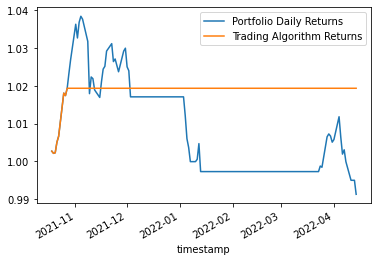

In [108]:
(1 + predictions_df[["Portfolio Daily Returns", "Trading Algorithm Returns"]]).cumprod().plot()

In [109]:
predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_df['Predicted'] = svm_pred

# Add the actual returns to the DataFrame
#predictions_df['Actual Returns'] = signals_df["Actual Returns"]
predictions_df['Actual Returns'] = signals_df["Actual Returns"]
# Add the strategy returns to the DataFrame
predictions_df['Trading Algorithm Returns'] = predictions_df['Actual Returns'] * predictions_df['Predicted']

# Review the DataFrame
display(predictions_df.head(100))
display(predictions_df.tail())

,Predicted,Actual Returns,Trading Algorithm Returns
timestamp,,,
2021-10-18 04:00:00+00:00,1.0,0.032122,0.032122
2021-10-19 04:00:00+00:00,1.0,-0.006712,-0.006712
2021-10-20 04:00:00+00:00,1.0,0.001770,0.001770
2021-10-21 04:00:00+00:00,1.0,0.032571,0.032571
2021-10-22 04:00:00+00:00,1.0,0.017539,0.017539
...,...,...,...
2022-03-04 05:00:00+00:00,0.0,-0.001191,-0.000000
2022-03-07 05:00:00+00:00,0.0,-0.040213,-0.000000
2022-03-08 05:00:00+00:00,0.0,0.024634,0.000000


,Predicted,Actual Returns,Trading Algorithm Returns
timestamp,,,
2022-04-08 04:00:00+00:00,0.0,-0.030049,-0.0
2022-04-11 04:00:00+00:00,0.0,-0.048328,-0.0
2022-04-12 04:00:00+00:00,0.0,0.011292,0.0
2022-04-13 04:00:00+00:00,0.0,0.035888,0.0
2022-04-14 04:00:00+00:00,0.0,-0.036552,-0.0


<AxesSubplot:xlabel='timestamp'>

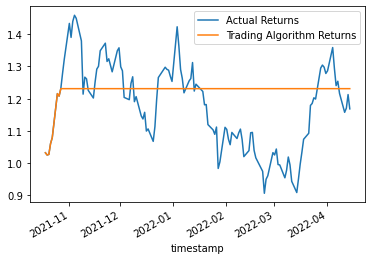

In [110]:
(1 + predictions_df[["Actual Returns", "Trading Algorithm Returns" ]]).cumprod().plot()

In [111]:
# Import Adaboost model from SKlearn
from sklearn.ensemble import AdaBoostClassifier

In [112]:
# Initiate the model instance
ada_model = AdaBoostClassifier()

# fit the model using the training data
ada_model = ada_model.fit(X_train_scaled, y_train)

#Use the testing dataset to generate model predictions
ada_pred = ada_model.predict(X_test_scaled)

#Review the model's predicted values
ada_pred[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [113]:
# Classification report to evaluate the model 
ada_testing_report= classification_report(y_test, ada_pred)

# Print report
print(ada_testing_report)



              precision    recall  f1-score   support

         0.0       0.57      1.00      0.72        71
         1.0       0.00      0.00      0.00        54

    accuracy                           0.57       125
   macro avg       0.28      0.50      0.36       125
weighted avg       0.32      0.57      0.41       125



C:\Users\Alex\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [114]:
#predictions DataFrame
pred_df = pd.DataFrame(index = X_test.index)

# Add the Ada model predictions to the DataFrame

pred_df["Predicted"] = ada_pred

# Add the actual returns 
pred_df["Portfolio Daily Returns"] = signals_df["Portfolio Daily Returns"]

# Add strategy returns to DataFrame
pred_df["Trading Algorithm Returns"] = pred_df["Portfolio Daily Returns"] * pred_df["Predicted"]

# Review the DataFrame
pred_df



,Predicted,Portfolio Daily Returns,Trading Algorithm Returns
timestamp,,,
2021-10-18 04:00:00+00:00,0.0,0.002689,0.0
2021-10-19 04:00:00+00:00,0.0,-0.000578,-0.0
2021-10-20 04:00:00+00:00,0.0,0.000152,0.0
2021-10-21 04:00:00+00:00,0.0,0.002793,0.0
2021-10-22 04:00:00+00:00,0.0,0.001549,0.0
...,...,...,...
2022-04-08 04:00:00+00:00,0.0,-0.003145,-0.0
2022-04-11 04:00:00+00:00,0.0,-0.004921,-0.0
2022-04-12 04:00:00+00:00,0.0,0.000000,0.0


<AxesSubplot:xlabel='timestamp'>

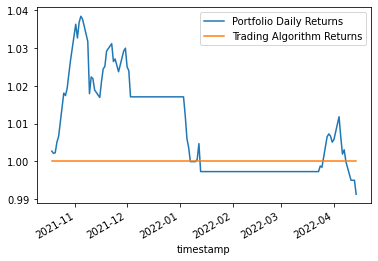

In [115]:
(1 + pred_df[["Portfolio Daily Returns", "Trading Algorithm Returns"]]).cumprod().plot()